In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\mhija\Desktop\new things\DATA\rock_density_xray.csv')

In [3]:
df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


<Axes: xlabel='Rebound Signal Strength nHz', ylabel='Rock Density kg/m3'>

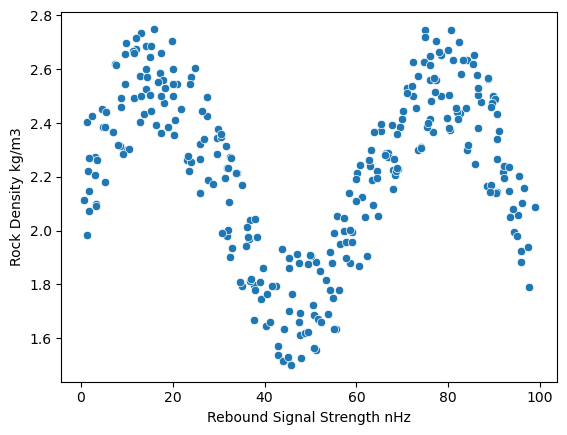

In [ ]:
sns.scatterplot(x='Rebound Signal Strength nHz', y='Rock Density kg/m3', data=df)

In [ ]:
'''We reshape with .values.reshape(-1, 1)
 in that case because most machine learning libraries 
 (like scikit-learn) expect the input features X to be a 2D array,
 even if you only have one feature column'''
# sklearn dose not know this a row or column
#so you have to spicify by doing reshape
X = df['Rebound Signal Strength nHz'].values.reshape(-1, 1)
y = df['Rock Density kg/m3']



array([[72.94512436],
       [14.2298772 ],
       [36.59733361],
       [ 9.57889939],
       [21.76589708],
       [89.64797256],
       [69.49273293],
       [20.15052036],
       [82.25633703],
       [64.42480217],
       [38.42706534],
       [ 9.89157994],
       [31.7410984 ],
       [90.4960676 ],
       [13.19342555],
       [ 9.55665673],
       [26.00550577],
       [24.81782725],
       [40.29631043],
       [29.60926638],
       [76.57740035],
       [82.61598742],
       [ 1.66229161],
       [17.32519267],
       [35.05157441],
       [63.47748521],
       [13.68823691],
       [17.49779896],
       [ 1.86382485],
       [17.96684624],
       [23.9388581 ],
       [66.36433682],
       [34.02717884],
       [76.03302052],
       [82.66759709],
       [66.78076834],
       [47.4528517 ],
       [74.02752794],
       [86.20473574],
       [72.24767039],
       [80.33899095],
       [36.86719496],
       [31.92883259],
       [85.68535822],
       [78.45459768],
       [19

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([2.2129072 , 2.18993078, 2.20772716, 2.21186474, 2.20050813,
       2.21307235, 2.21923253, 2.21171673, 2.19376169, 2.19345974,
       2.22212031, 2.18972559, 2.23319395, 2.24443362, 2.21847594,
       2.20916931, 2.19272073, 2.22533454, 2.21010099, 2.23619393,
       2.19924925, 2.24515532, 2.19846127, 2.19687634, 2.18887543,
       2.23518759, 2.18805613, 2.25760083, 2.20177424, 2.19422952,
       2.24029126, 2.20548101, 2.20353335, 2.23294635, 2.25569868,
       2.19307557, 2.24364106, 2.18969883, 2.22385253, 2.20535388,
       2.24795752, 2.22723074, 2.20334989, 2.21603887, 2.19449948])

In [19]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.2630059641510617
Root Mean Squared Error: 0.31715063679170175


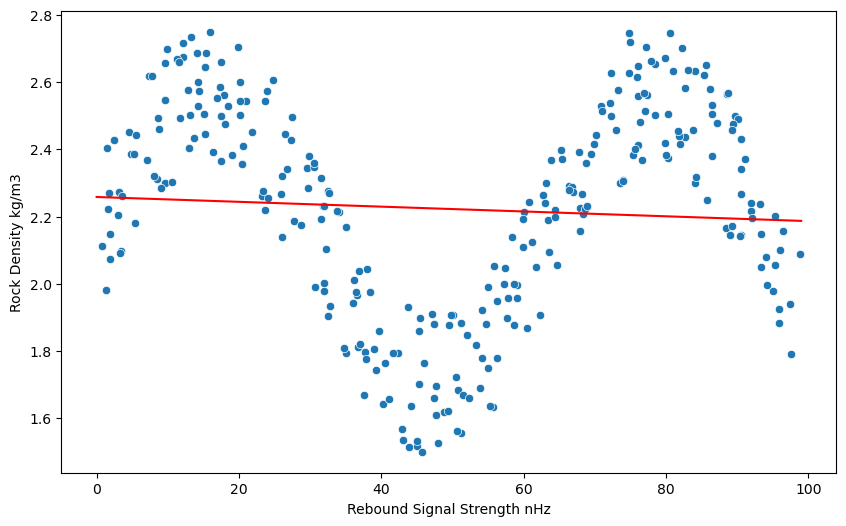

In [21]:
signal_range = np.arange(0,100)
predicted_density = model.predict(signal_range.reshape(-1, 1))
plt.figure(figsize=(10, 6),dpi=100)
sns.scatterplot(x='Rebound Signal Strength nHz', y='Rock Density kg/m3', data=df)
plt.plot(signal_range, predicted_density, color='red', label='Predicted Density')